In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam,SGD

In [2]:
(x_train_data, t_train_data), (x_test_data, t_test_data)=fashion_mnist.load_data()

In [3]:
print(x_train_data.shape, t_train_data.shape)
print(x_test_data.shape, t_test_data.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
print(t_train_data[0])

9


<function matplotlib.pyplot.show(close=None, block=None)>

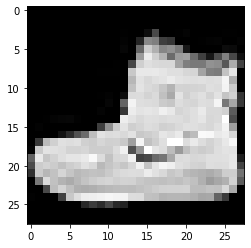

In [5]:
import matplotlib.pyplot as plt
#이미지 확인 (데이터를 이미지로 나타내기 컬러는 정할 수는 없음)
img=x_train_data[0]
plt.imshow(img,cmap='gray')
plt.show

In [6]:
#데이터 확인
print(x_train_data[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

<function matplotlib.pyplot.show(close=None, block=None)>

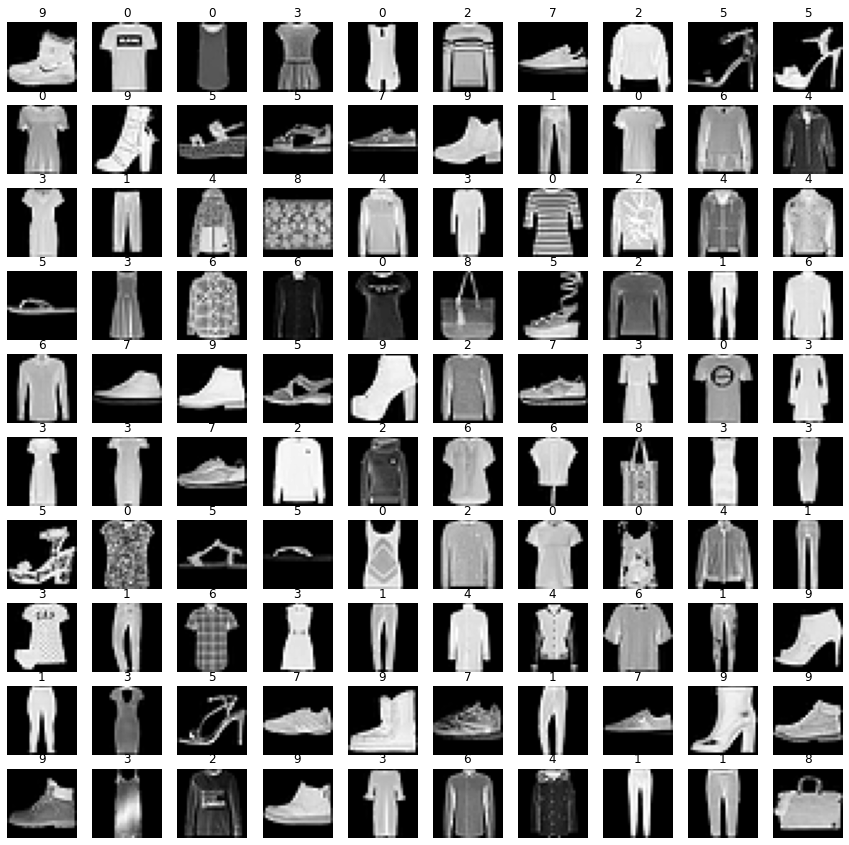

In [28]:
plt.figure(figsize=(15,15)) #15인치 
for index in range(0,100,1):
    plt.subplot(10,10,index+1)
    plt.imshow(x_train_data[index],cmap='gray')
    plt.axis('off')
    plt.title(str(t_train_data[index]))
plt.show

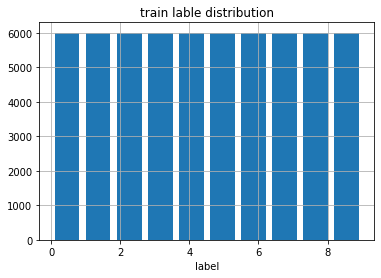

In [8]:
plt.title('train lable distribution')
plt.grid()
plt.xlabel('label')
plt.hist(t_train_data,bins=10,rwidth=0.8)
plt.show()

In [9]:
label_list=np.zeros(10)
print(label_list)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
for idx in range(len(t_train_data)):
    label=int(t_train_data[idx])
    label_list[label]+=1
print(label_list)

[6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000.]


In [11]:
# 값이 1에서 0 사이의 값으로 바뀜 (오버플로? 일어나니깐 작은 수치로 바꿔주었다.)
x_train=(x_train_data-0.0)/(255.0-0.0)
x_test=(x_test_data-0.0)/(255.0-0.0)
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [12]:
t_train_data[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [13]:
#(One_Hot encoding): 여러개 중 하나만 핫하게 만든다?
t_train=tf.keras.utils.to_categorical(t_train_data, num_classes=10)
t_test=tf.keras.utils.to_categorical(t_test_data, num_classes=10)

In [14]:
print(t_train[0]) #9
print(t_test[0]) #9

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [15]:
#모델 만들기
model=Sequential()
#28,28을 일차원으로 펼칠 것이다.
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [16]:
model.compile(optimizer=Adam(learning_rate=1e-4), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
# 컴파일 됨

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [17]:
hist=model.fit(x_train, t_train, epochs=70, validation_split=0.3)

Epoch 1/70
1313/1313 [==============================] - 2s 1ms/step - loss: 0.7968 - accuracy: 0.7522 - val_loss: 0.5655 - val_accuracy: 0.8119
Epoch 2/70
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5175 - accuracy: 0.8288 - val_loss: 0.4886 - val_accuracy: 0.8334
Epoch 3/70
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4634 - accuracy: 0.8430 - val_loss: 0.4588 - val_accuracy: 0.8446
Epoch 4/70
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4346 - accuracy: 0.8508 - val_loss: 0.4371 - val_accuracy: 0.8507
Epoch 5/70
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4139 - accuracy: 0.8585 - val_loss: 0.4179 - val_accuracy: 0.8567
Epoch 6/70
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3996 - accuracy: 0.8625 - val_loss: 0.4088 - val_accuracy: 0.8587
Epoch 7/70
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3863 - accuracy: 0.8672 - val_loss: 0.4010 - val_accuracy:

In [18]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 811us/step - loss: 0.3599 - accuracy: 0.8786


[0.3598574101924896, 0.878600001335144]

In [19]:
predictions=model.predict(x_test)

313/313 [==============================] - 0s 710us/step


In [20]:
print(predictions[0])
print(t_test[0])

[6.4243409e-07 2.8034377e-11 4.0844981e-05 4.9650322e-07 4.9249616e-07
 1.7003996e-02 4.5636866e-06 1.2326781e-02 1.7465125e-05 9.7060466e-01]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [21]:
label=np.argmax(predictions[0])
print(label)

9


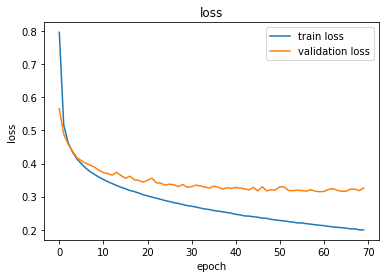

In [22]:
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.show()

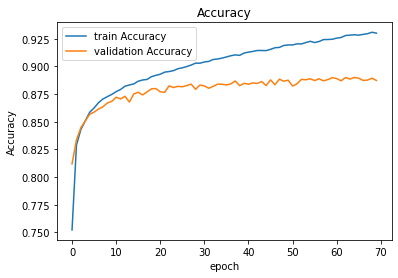

In [23]:
# loss대신 정확도
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'],label='train Accuracy')
plt.plot(hist.history['val_accuracy'], label='validation Accuracy')
plt.legend(loc='best')
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [25]:
plt.figure(figsize=(6,6))
# t_test,prediction에 있는 값으로 그래프를 그릴 것임
cm=confusion_matrix(np.argmax(t_test, axis=-1),
                   np.argmax(predictions,axis=-1))
print(cm)

[[878   1  16  36   6   0  52   0  11   0]
 [  4 964   0  27   2   0   3   0   0   0]
 [ 22   1 811  20 109   0  34   0   3   0]
 [ 22   4  18 913  27   0  11   0   5   0]
 [  0   1  84  40 843   0  31   0   1   0]
 [  0   0   0   1   0 958   0  26   2  13]
 [178   2 104  44 105   0 557   0  10   0]
 [  0   0   0   0   0  21   0 950   0  29]
 [  9   1   7   6   5   1   4   7 960   0]
 [  0   0   0   0   0   8   1  39   0 952]]


<Figure size 432x432 with 0 Axes>

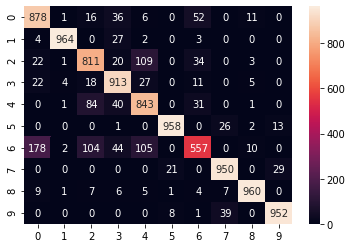

In [26]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()